In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
train = pd.read_csv("../data/train.csv")
train["date"] = pd.to_datetime(train["date"])
test = pd.read_csv("../data/test.csv")
oil = pd.read_csv("../data/oil.csv")  ## 오일 가격??
oil["date"] = pd.to_datetime(oil["date"])
holidays_events = pd.read_csv("../data/holidays_events.csv") ## 공휴일 정보
stores = pd.read_csv("../data/stores.csv") ## store_nbr 에 대한 정보
transactions = pd.read_csv("../data/transactions.csv") ## 거래량?

In [128]:
len(test)

28512

* train (학습에 사용 가능)  
  * date:           2013-01-01 ~ 2017-08-15
  * store_nbr:      가게 번호 (1~9)
  * family:         물품 분류
  * sales:          판매량(예측하고자하는 값 y)
  * onpromotion:    물품 분류 내에 물품들의 종류 수 

* test
  * date:           2017-08-16 ~ 2017-08-31

* oil  (학습에 사용 가능)  
  * date:           2013-01-01 ~ 2017-08-31 (바로 사용가능)
  * dcoilwtico:     오일 가격일듯

* holidays_events
  * 공휴일 정보:    지역별, 대체 공휴일 유무 
  * 기간:           2012 ~ 2017

* stores    
  * store_nbr에 대한 정보
  * store_nbr : cluster 와 type 으로 대체 

* transactions 
  * date:           2013-01-01 ~ 2017-08-15
  * 거래량

In [130]:
train["date"] = pd.to_datetime(train["date"])
test["date"] = pd.to_datetime(test["date"])
holidays_events["date"] = pd.to_datetime(holidays_events["date"])
oil["date"] = pd.to_datetime(oil["date"])

In [148]:
# train = pd.merge(train, oil, on="date").fillna(method="backfill")
_ = pd.merge(test, oil[oil["date"] >= pd.to_datetime("2017-08-16")], how="outer", on="date")

In [142]:
_[~_["id"].isna()].isna()

id                0
date              0
store_nbr         0
family            0
onpromotion       0
dcoilwtico     7128
dtype: int64

In [160]:
_.index + train.index

ValueError: operands could not be broadcast together with shapes (28512,) (2143746,) 

In [132]:
len(_)

29718

In [125]:
len(test)

21384

In [97]:
train["onpromotion2"] = train["onpromotion"]**2
train["dcoilwtico2"] = train["dcoilwtico"]**2
train 

<Axes: >

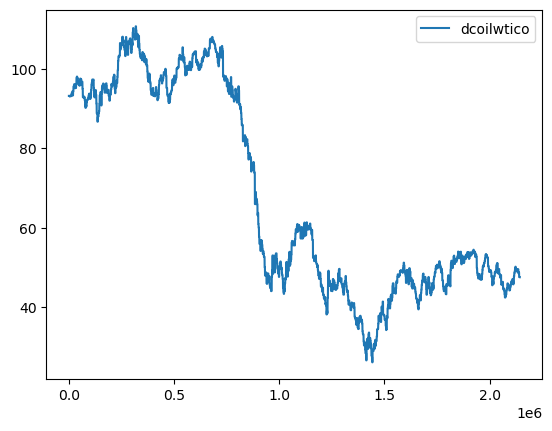

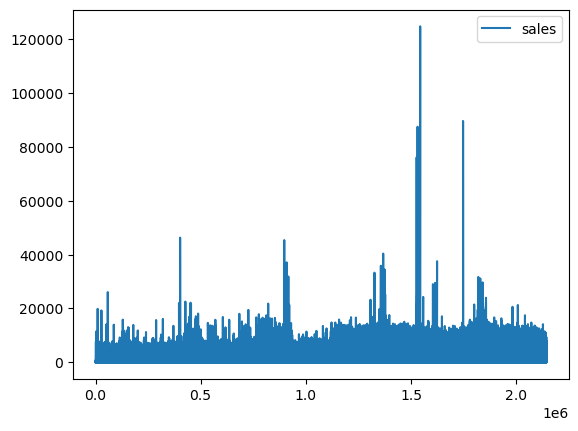

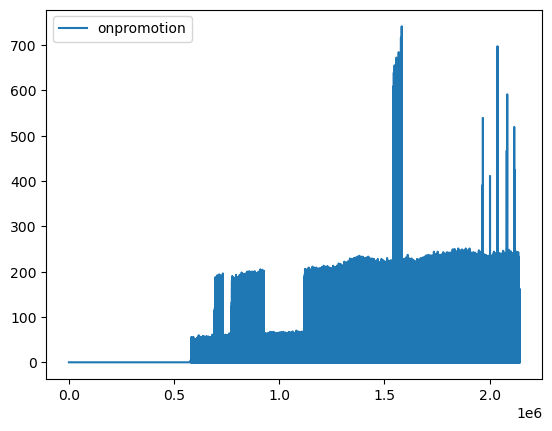

In [118]:
train[["dcoilwtico"]].plot()
train[["sales"]].plot()
train[["onpromotion"]].plot()

In [108]:
train["onpromotion"].describe()

count    2.143746e+06
mean     2.831395e+00
std      1.324253e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.410000e+02
Name: onpromotion, dtype: float64

In [89]:
train

,id,date,store_nbr,family,onpromotion,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.80
1,3000889,2017-08-16,1,BABY CARE,0,46.80
2,3000890,2017-08-16,1,BEAUTY,2,46.80
3,3000891,2017-08-16,1,BEVERAGES,20,46.80
4,3000892,2017-08-16,1,BOOKS,0,46.80
...,...,...,...,...,...,...
21379,3029395,2017-08-31,9,POULTRY,1,47.26
21380,3029396,2017-08-31,9,PREPARED FOODS,0,47.26
21381,3029397,2017-08-31,9,PRODUCE,1,47.26
21382,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,47.26


In [114]:
_ = pd.merge(train, holidays_events, how="outer", on="date")
zero = _[_["sales"] == 0].drop(columns=["id", "description"])

In [117]:
zero.describe()

,date,store_nbr,sales,onpromotion,dcoilwtico,onpromotion2,dcoilwtico2
count,684422,684422.000000,684422.0,684422.000000,684422.000000,684422.000000,684422.000000
mean,2014-10-07 00:43:48.020723968,28.506945,0.0,0.000045,77.348350,0.000431,6632.819230
min,2013-01-01 00:00:00,1.000000,0.0,0.000000,26.190000,0.000000,685.916100
25%,2013-09-17 00:00:00,17.000000,0.0,0.000000,49.590000,0.000000,2459.168100
50%,2014-07-07 00:00:00,28.000000,0.0,0.000000,93.030000,0.000000,8654.580900
75%,2015-08-03 00:00:00,42.000000,0.0,0.000000,99.110000,0.000000,9822.792100
max,2017-08-15 00:00:00,54.000000,0.0,16.000000,110.620000,256.000000,12236.784400
std,NaN,14.986681,0.0,0.020761,25.496135,0.311002,3736.652074


In [55]:
_[_["date"] == pd.to_datetime("2013-01-02")]

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type,locale,locale_name,description,transferred
1782,1782.0,2013-01-02,1.0,AUTOMOTIVE,2.000,0.0,93.14,NaN,NaN,NaN,NaN,NaN
1783,1783.0,2013-01-02,1.0,BABY CARE,0.000,0.0,93.14,NaN,NaN,NaN,NaN,NaN
1784,1784.0,2013-01-02,1.0,BEAUTY,2.000,0.0,93.14,NaN,NaN,NaN,NaN,NaN
1785,1785.0,2013-01-02,1.0,BEVERAGES,1091.000,0.0,93.14,NaN,NaN,NaN,NaN,NaN
1786,1786.0,2013-01-02,1.0,BOOKS,0.000,0.0,93.14,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3559,3559.0,2013-01-02,9.0,POULTRY,651.292,0.0,93.14,NaN,NaN,NaN,NaN,NaN
3560,3560.0,2013-01-02,9.0,PREPARED FOODS,83.000,0.0,93.14,NaN,NaN,NaN,NaN,NaN
3561,3561.0,2013-01-02,9.0,PRODUCE,0.000,0.0,93.14,NaN,NaN,NaN,NaN,NaN
3562,3562.0,2013-01-02,9.0,SCHOOL AND OFFICE SUPPLIES,0.000,0.0,93.14,NaN,NaN,NaN,NaN,NaN


In [64]:
holidays_events["locale_name"].unique()
holidays_events["locale"].unique()
# holidays_events["type"].unique()

holidays_events[holidays_events["locale"] == "Regional"]



,date,type,locale,locale_name,description,transferred
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
23,2012-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
24,2012-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
47,2013-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
58,2013-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
76,2013-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
77,2013-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
96,2014-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
112,2014-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False


In [65]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [40]:
holidays_events[holidays_events["date"] == pd.to_datetime("2013-01-01")]

,date,type,locale,locale_name,description,transferred
41,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False


In [18]:
_.isna().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico     71280
dtype: int64

In [9]:
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


<Axes: xlabel='date'>

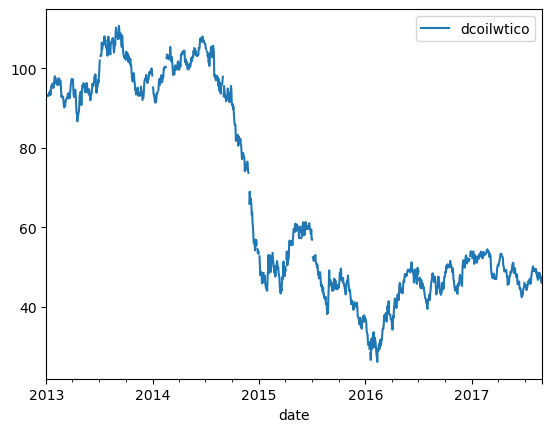

In [8]:
oil.plot(x="date", y="dcoilwtico")

In [12]:
train["day"] = train["date"].dt.day
train["month"] = train["date"].dt.month
train["year"] = train["date"].dt.year

In [22]:
for i in range(1, 32):
    print(f"Day : {i}")
    print(train[train["day"] == i]["sales"].mean())

Day : 1
399.57674748619934
Day : 2
417.2152196101661
Day : 3
402.1590237857353
Day : 4
392.8069383490732
Day : 5
383.75345145537824
Day : 6
373.0583679650763
Day : 7
364.15240665479394
Day : 8
352.07999101832604
Day : 9
349.6622924148939
Day : 10
338.8399877953023
Day : 11
340.4492400516815
Day : 12
342.4308240549403
Day : 13
339.6794814250922
Day : 14
336.0143355153649
Day : 15
348.73670744734346
Day : 16
361.9942653132007
Day : 17
355.4308940203091
Day : 18
355.4157128045444
Day : 19
350.4757426379349
Day : 20
356.92443136632687
Day : 21
355.30234475750945
Day : 22
352.72075754131015
Day : 23
357.6816876134037
Day : 24
345.2015972487961
Day : 25
326.4898266202416
Day : 26
335.5051336356586
Day : 27
328.8735385856627
Day : 28
334.62860385447607
Day : 29
345.82323366026606
Day : 30
367.3620228911605
Day : 31
389.5420134152918


In [17]:
train[["day", "sales"]].groupby(by="day").value_counts()

day  sales    
1    0.000        36426
     1.000         3193
     2.000         2456
     3.000         1951
     4.000         1562
                  ...  
31   336.132          1
     336.121          1
     336.101          1
     336.010          1
     17914.000        1
Name: count, Length: 594104, dtype: int64

In [44]:
train[train["onpromotion"] == 0]["sales"].describe()

count    2.389559e+06
mean     1.582467e+02
std      6.148945e+02
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+00
75%      5.400000e+01
max      8.957636e+04
Name: sales, dtype: float64

In [36]:
train[["sales", "onpromotion"]].corr()

,sales,onpromotion
sales,1.000000,0.427923
onpromotion,0.427923,1.000000


In [46]:
family = train["family"].unique()
plt.figure(figsize=(15,10))
for f in family:
    sns.scatterplot(x="date", y="sales", data=train[train["onpromotion"] == 0], marker="o", label=f)
plt.legend()
plt.show()